## Scrape IMDb and visualize ratings for The Simpsons

Import packages

In [1]:
from selenium import webdriver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Fetch data

In [2]:
driver = webdriver.Chrome()

all_ratings = []
for season in range(1,34):
    try:
        driver.get(f'https://www.imdb.com/title/tt0096697/episodes?season={season}')
        for episode in range(1,20):
            try:
                xpath='//*[@id="episodes_content"]/div[2]/div[2]/div[{}]/div[2]/strong/a'.format(episode)
                xpath2='//*[@id="episodes_content"]/div[2]/div[2]/div[{}]/div[2]/div[2]/div[1]/span[2]'.format(episode)
                episode_name = driver.find_element_by_xpath(xpath)
                episode_rating = driver.find_element_by_xpath(xpath2)
                rating=[str(season),str(episode),episode_name.text,episode_rating.text]
                all_ratings.append(rating)
            except:
                xpath='//*[@id="episodes_content"]/div[3]/div[2]/div[{}]/div[2]/strong/a'.format(episode)
                xpath2='//*[@id="episodes_content"]/div[3]/div[2]/div[{}]/div[2]/div[2]/div[1]/span[2]'.format(episode)
                episode_name = driver.find_element_by_xpath(xpath)
                episode_rating = driver.find_element_by_xpath(xpath2)
                rating=[str(season),str(episode),episode_name.text,episode_rating.text]
                all_ratings.append(rating)
    except:
        pass


<ipython-input-2-386cfceaa69b>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  episode_name = driver.find_element_by_xpath(xpath)
<ipython-input-2-386cfceaa69b>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  episode_rating = driver.find_element_by_xpath(xpath2)
<ipython-input-2-386cfceaa69b>:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  episode_name = driver.find_element_by_xpath(xpath)


In [3]:
df=pd.DataFrame(all_ratings)

In [4]:
df.columns=['Season','Episode','Title','Rating']
df['Rating']=pd.to_numeric(df['Rating'])


Visualize Data

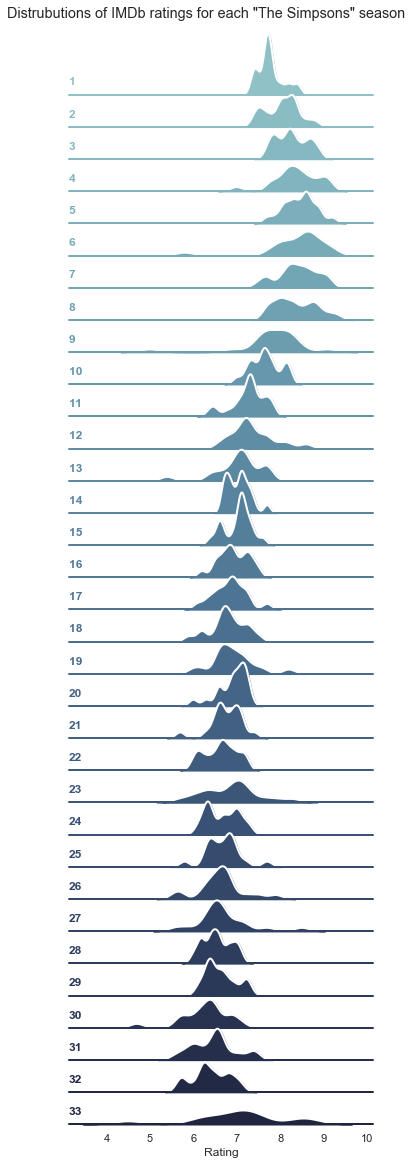

In [8]:
# Adapted from https://seaborn.pydata.org/examples/kde_ridgeplot.html

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(33, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Season", hue="Season", aspect=10, height=0.5, palette=pal)

# Draw the densities in a few steps

g.map(sns.kdeplot, "Rating",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Rating", clip_on=False, color="w", lw=2, bw_adjust=.5)


g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Rating")

# Set the subplots to overlap

g.figure.subplots_adjust(hspace=-0.5)



# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.subplots_adjust(top=0.96) # adjust the Figure in rp
g.fig.suptitle('Distrubutions of IMDb ratings for each "The Simpsons" season')

g.figure.savefig("output.png")